In [8]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(r"C:\Users\SAI\Downloads\diabetes.csv", header=None, names=col_names)

In [9]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [10]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv(r"C:\Users\SAI\Downloads\diabetes.csv")

# Split into features and target
X = df.drop('Outcome', axis=1)  # or the correct target column
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=16)

# Train logistic regression
logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [16]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [17]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]])

NameError: name 'Text' is not defined

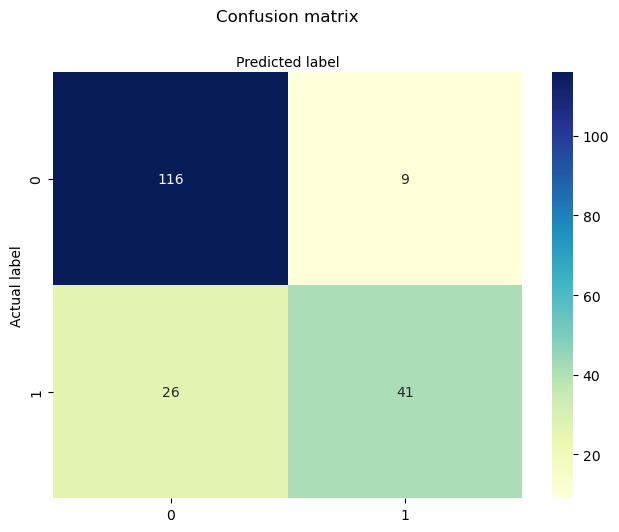

In [18]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [19]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot for TRAINING DATA
feature = 'glucose'
X_train_feature = X_train_raw[feature]
y_train_pred = logreg.predict(X_train_scaled)

# Generate values for smooth logistic curve
X_vals = np.linspace(X_train_feature.min(), X_train_feature.max(), 300)
X_vals_full = pd.DataFrame({col: X_train_raw[col].median() for col in feature_cols}, index=range(300))
X_vals_full[feature] = X_vals

# Scale and predict probabilities
X_vals_scaled = scaler.transform(X_vals_full)
y_vals_prob = logreg.predict_proba(X_vals_scaled)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_train_feature, y_train, color='lightcoral', label='Actual (Train)')
plt.scatter(X_train_feature, y_train_pred, color='firebrick', alpha=0.5, label='Predicted (Train)')
plt.plot(X_vals, y_vals_prob, color='blue', linewidth=2, label='Logistic Curve')
plt.title(f'Training Data: {feature.capitalize()} vs Diabetes')
plt.xlabel(feature.capitalize())
plt.ylabel('Diabetes Outcome')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'X_train_raw' is not defined